In [1]:
!pip install gudhi

In [2]:
import gudhi
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D

In [4]:
st = gudhi.SimplexTree()

## For a better readability we split simplices by their dimensions

In [5]:
zero_dim_simplices = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11]]
one_dim_simplices = [[1, 2], [1, 9], [1, 11], [2, 9], [2, 11], [9, 11], [2, 3], [3, 4], [4, 5], [5, 3], [3, 6], [6, 7], [6, 8], [7, 8], [7, 10], [8, 10], [7, 9], [9, 10], [9, 11], [10, 11]]
two_dim_simplices = [[1, 2, 9], [1, 2, 11], [1, 9, 11], [2, 9, 11], [3, 4, 5], [6, 7, 8], [7, 8, 10], [9, 10, 11], [7, 10, 9]]
three_dim_simplices = [[1, 2, 9, 11]]


simplices = zero_dim_simplices + one_dim_simplices + two_dim_simplices + three_dim_simplices
simplices

[[1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [1, 2],
 [1, 9],
 [1, 11],
 [2, 9],
 [2, 11],
 [9, 11],
 [2, 3],
 [3, 4],
 [4, 5],
 [5, 3],
 [3, 6],
 [6, 7],
 [6, 8],
 [7, 8],
 [7, 10],
 [8, 10],
 [7, 9],
 [9, 10],
 [9, 11],
 [10, 11],
 [1, 2, 9],
 [1, 2, 11],
 [1, 9, 11],
 [2, 9, 11],
 [3, 4, 5],
 [6, 7, 8],
 [7, 8, 10],
 [9, 10, 11],
 [7, 10, 9],
 [1, 2, 9, 11]]

In [6]:
def build_tree_and_print_info(simplices, name):
  simplex_tree = gudhi.SimplexTree()

  for simplex in simplices:
    simplex_tree.insert(simplex)
  
  simplex_tree.compute_persistence()

  graph = nx.Graph()
  # we can just take all one-dimensional simplices as edges of our graph and filter the rest simplices out.
  edges = [simplex for simplex in simplices if len(simplex) == 2]
  graph.add_edges_from(edges)

  print(f"{name}.")
  print(f"Number of vertices: {simplex_tree.num_vertices()}")
  print(f"Betti numbers: {simplex_tree.betti_numbers()}")
  print(f"List of edges: {edges}")

  fixed_pos = nx.spring_layout(graph, seed = 100)
  plt.title(name)
  nx.draw(graph, with_labels=True, pos=fixed_pos, font_weight='bold', node_color='orange', node_size=750)

# Let's check it for the graph provided as the example:

Default graph.
Number of vertices: 11
Betti numbers: [1, 1, 0]
List of edges: [[1, 2], [1, 9], [1, 11], [2, 9], [2, 11], [9, 11], [2, 3], [3, 4], [4, 5], [5, 3], [3, 6], [6, 7], [6, 8], [7, 8], [7, 10], [8, 10], [7, 9], [9, 10], [9, 11], [10, 11]]


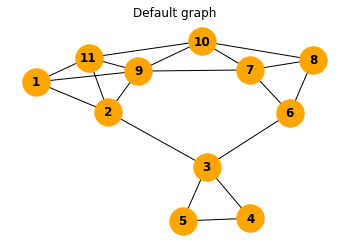

In [7]:
build_tree_and_print_info(simplices, "Default graph")

## Now, let's add a new 'hole' in our topology. This is going to be vertex 12 connected to vertices 8 and 11

Graph with one additional vertex forming a new hole.
Number of vertices: 12
Betti numbers: [1, 2, 0]
List of edges: [[1, 2], [1, 9], [1, 11], [2, 9], [2, 11], [9, 11], [2, 3], [3, 4], [4, 5], [5, 3], [3, 6], [6, 7], [6, 8], [7, 8], [7, 10], [8, 10], [7, 9], [9, 10], [9, 11], [10, 11], [12, 8], [12, 11]]


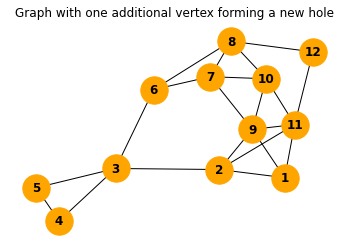

In [8]:
new_simplices = simplices + [[12], [12, 8], [12, 11]]

build_tree_and_print_info(new_simplices, "Graph with one additional vertex forming a new hole")
new_simplices = simplices + [[12], [13], [6, 12], [12, 8], [11, 13], [10, 13]]

# This time we are adding 2 new points and they are forming 2 new 'holes' in our graph

In [9]:
two_new_points_simplices = simplices + [[12], [13], [6, 12], [12, 8], [11, 13], [10, 13]]

Graph with 2 additional vertices that are not connected, i.e. +2 new holes.
Number of vertices: 13
Betti numbers: [1, 3, 0]
List of edges: [[1, 2], [1, 9], [1, 11], [2, 9], [2, 11], [9, 11], [2, 3], [3, 4], [4, 5], [5, 3], [3, 6], [6, 7], [6, 8], [7, 8], [7, 10], [8, 10], [7, 9], [9, 10], [9, 11], [10, 11], [6, 12], [12, 8], [11, 13], [10, 13]]


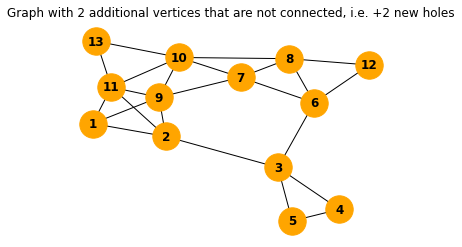

In [10]:
build_tree_and_print_info(two_new_points_simplices, "Graph with 2 additional vertices that are not connected, i.e. +2 new holes")